## DBSCAN process bullets:
### -2+ numeric variables
### -nparray dtype = float
### -standard normal-scale
### -DBSCAN object with parameters: eps, min_samples
### -fit object on standardized array
### -extract labels
### -add to DF to analyze/explore
### -plot

In [98]:
# set up environment
from __future__ import division
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import math
from sklearn import metrics
from random import randint
from matplotlib import style

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [99]:
# read in customers csv
dfo = pd.read_csv('customers.csv')

In [100]:
dfo.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [101]:
# drop channel and region
df = dfo[['Grocery', 'Milk', 'Fresh']]
df1 = dfo[['Grocery','Detergents_Paper','Frozen']]

In [102]:
# create a numpy array of float types
np_array = df.values.astype('float32', copy=False)

In [103]:
stscaler = StandardScaler().fit(np_array)
np_array = stscaler.transform(np_array)
np_array[0:10]

array([[-0.0411149 ,  0.5235678 ,  0.05293319],
       [ 0.17031837,  0.5444577 , -0.39130196],
       [-0.0281571 ,  0.40853772, -0.44702926],
       [-0.3929769 , -0.62402   ,  0.1001114 ],
       [-0.07935619, -0.05239645,  0.8402394 ],
       [-0.29763708,  0.3340666 , -0.20480551],
       [-0.10284877, -0.35231563,  0.00995035],
       [ 0.15535896, -0.11398095, -0.34998146],
       [-0.18533617, -0.2914094 , -0.4779009 ],
       [ 1.1514235 ,  0.7184949 , -0.4744971 ]], dtype=float32)

In [104]:
dbsc = DBSCAN(eps = 0.75, min_samples = 15).fit(np_array)

In [105]:
labels = dbsc.labels_
labels[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [106]:
df['labels'] = labels
df.labels.value_counts()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


 0    400
-1     40
Name: labels, dtype: int64

In [107]:
df[df.labels==-1].head()

,Grocery,Milk,Fresh,labels
12,11757,12319,31714,-1
23,22019,36423,26373,-1
28,25957,20484,4113,-1
39,902,555,56159,-1
45,21531,22044,5181,-1


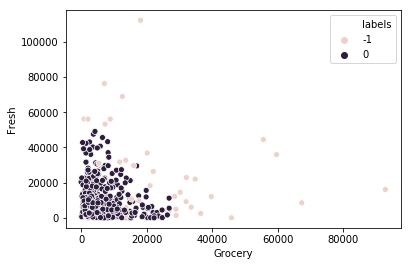

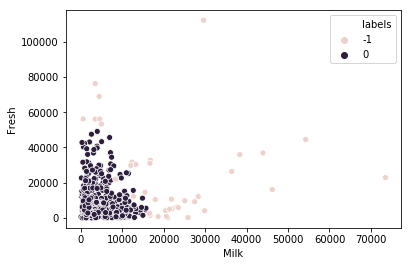

In [108]:
sns.scatterplot(df.Grocery, df.Fresh, hue=df.labels)
plt.show()

sns.scatterplot(df.Milk, df.Fresh, hue=df.labels)
plt.show()

Text(0.5, 0, 'Grocery')

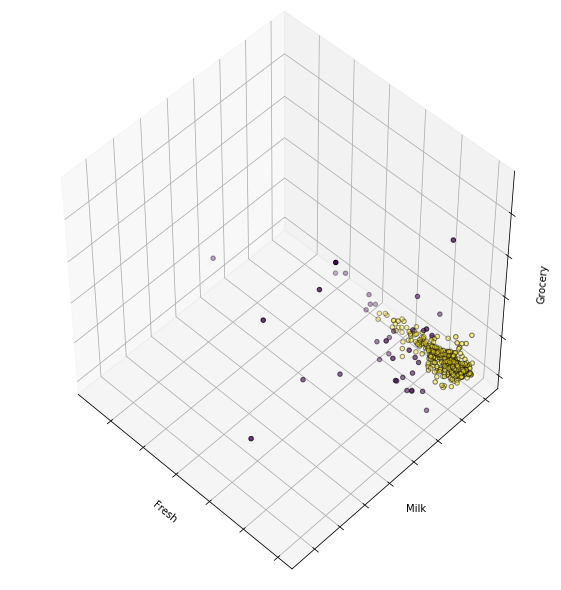

In [109]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

# plot the points
ax.scatter(df.Fresh, df.Milk, df.Grocery,
           c=df.labels, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.set_xlabel('Fresh')
ax.set_ylabel('Milk')
ax.set_zlabel('Grocery')

In [114]:
#try with another thing:
df1 = dfo[['Grocery','Detergents_Paper','Frozen']]
np_array1 = df1.values.astype('float32', copy=False)
stscaler1 = StandardScaler().fit(np_array1)
np_array1 = stscaler.transform(np_array1)

In [117]:
dbsc1 = DBSCAN(eps = 0.75, min_samples = 15).fit(np_array1)

In [118]:
labels = dbsc1.labels_
labels[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [119]:
df1['labels'] = labels
df1.labels.value_counts()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


 0    424
-1     16
Name: labels, dtype: int64

# 

In [120]:
df1.head()

,Grocery,Detergents_Paper,Frozen,labels
0,7561,2674,214,0
1,9568,3293,1762,0
2,7684,3516,2405,0
3,4221,507,6404,0
4,7198,1777,3915,0


Text(0.5, 0, 'Frozen')

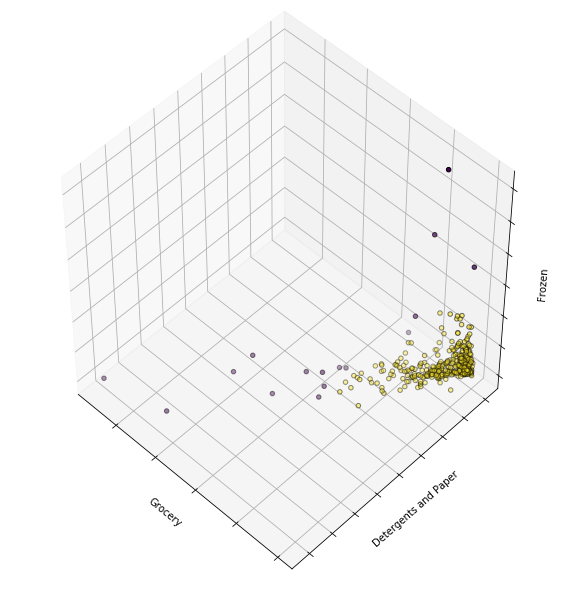

In [121]:
fig = plt.figure(1, figsize=(8, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

# plot the points
ax.scatter(df1.Grocery, df1.Detergents_Paper, df1.Frozen,
           c=df1.labels, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.set_xlabel('Grocery')
ax.set_ylabel('Detergents and Paper')
ax.set_zlabel('Frozen')

In [130]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 4 columns):
Grocery             440 non-null int64
Detergents_Paper    440 non-null int64
Frozen              440 non-null int64
labels              440 non-null int64
dtypes: int64(4)
memory usage: 13.8 KB


In [131]:
dfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [132]:
dfhmm = dfo
dfhmm['labels'] = df1['labels']

In [135]:
dfhmm[dfhmm.labels==-1]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
47,2,3,44466,54259,55571,7782,24171,6465,-1
61,2,3,35942,38369,59598,3254,26701,2017,-1
65,2,3,85,20959,45828,36,24231,1423,-1
85,2,3,16117,46197,92780,1026,40827,2944,-1
86,2,3,22925,73498,32114,987,20070,903,-1
92,2,3,9198,27472,32034,3232,18906,5130,-1
93,1,3,11314,3090,2062,35009,71,2698,-1
109,2,3,1406,16729,28986,673,836,3,-1
145,2,3,22039,8384,34792,42,12591,4430,-1
181,1,3,112151,29627,18148,16745,4948,8550,-1


In [144]:
dfhmm.drop(columns=['Channel', 'Region']).describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,-0.036364
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,0.187406
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,-1.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,0.000000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,0.000000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,0.000000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,0.000000


## Use dbscan to detect anomalies in number of bedrooms and finished square feet of property for the filtered dataset you used in the clustering project (single unit properties with a logerror).

In [146]:
import acquire_zillow
import prepare_zillow

In [147]:
dfz = acquire_zillow.get_zillow()

In [148]:
dfz = prepare_zillow.prep_zillow(dfz)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


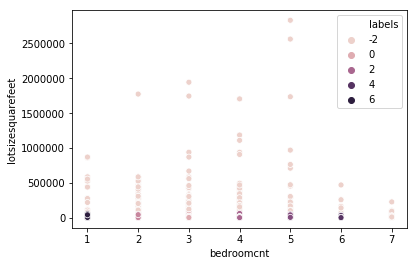

In [153]:
## -2+ numeric variables
dfbdsqft = dfz[['bedroomcnt','lotsizesquarefeet']]
## -nparray dtype = float
npz = dfbdsqft.values.astype('float32', copy=False)
## -standard normal-scale
stscalerz = StandardScaler().fit(npz)
npz = stscalerz.transform(npz)
## -DBSCAN object with parameters: eps, min_samples
dbzlol = DBSCAN(eps = 0.9, min_samples = 200).fit(npz)
## -fit object on standardized array ^^
## -extract labels
labelz = dbzlol.labels_
## -add to DF to analyze/explore
dfbdsqft['labels'] = labelz
## -plot
sns.scatterplot(dfbdsqft.bedroomcnt, dfbdsqft.lotsizesquarefeet, hue=dfbdsqft.labels)
plt.show()

In [154]:
dbzlol = DBSCAN(eps = 0.9, min_samples = 200).fit(npz)
labelz = dbzlol.labels_
dfbdsqft['labels'] = labelz
dfbdsqft.labels.value_counts()


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


 0    31613
 2    16880
 1    11815
 3     4035
 4      625
 5      614
-1      476
Name: labels, dtype: int64

In [155]:
dbzlol = DBSCAN(eps = 0.9, min_samples = 800).fit(npz)
labelz = dbzlol.labels_
dfbdsqft['labels'] = labelz
dfbdsqft.labels.value_counts()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


 0    31497
 2    16839
 1    11811
 3     4018
-1     1893
Name: labels, dtype: int64

## playing with mall data

In [164]:
import acquire_mall
import prepare_mall

In [165]:
dfmall = prepare_mall.prep_mall_data(acquire_mall.get_mall_data())

In [166]:
dfmall.head()

,gender,age,annual_income,spending_score,gender_e
customer_id,,,,,
1,Male,19,15,39,1
2,Male,21,15,81,1
3,Female,20,16,6,0
4,Female,23,16,77,0
5,Female,31,17,40,0


In [173]:
## -2+ numeric variables
dfmall = dfmall[['age','annual_income','spending_score']]
## -nparray dtype = float
npmall = dfmall.values.astype('float32', copy=False)
## -standard normal-scale
stscaler_mall = StandardScaler().fit(npmall)
npmall = stscaler_mall.transform(npmall)
## -DBSCAN object with parameters: eps, min_samples
dbmall = DBSCAN(eps = 0.9, min_samples = 10).fit(npmall)
## -fit object on standardized array ^^
## -extract labels
labels = dbmall.labels_
## -add to DF to analyze/explore
dfmall['labels'] = labels
dfmall.labels.value_counts()

 0    191
-1      9
Name: labels, dtype: int64

Text(0.5, 0, 'spending_score')

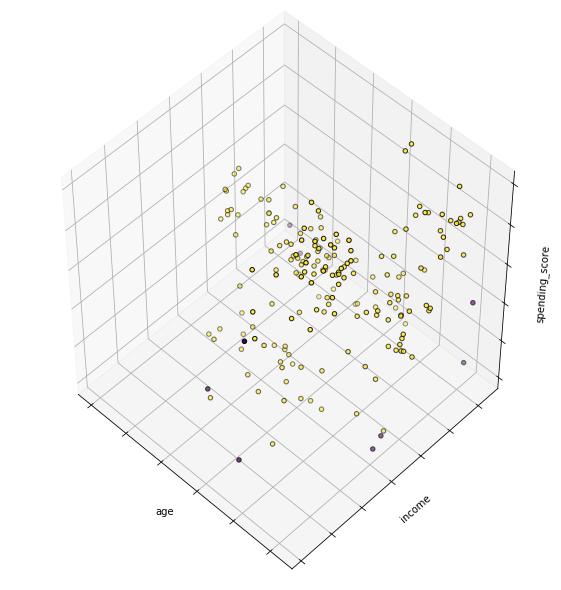

In [174]:
fig = plt.figure(1, figsize=(8, 8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

# plot the points
ax.scatter(dfmall.age, dfmall.annual_income, dfmall.spending_score,
           c=dfmall.labels, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.set_xlabel('age')
ax.set_ylabel('income')
ax.set_zlabel('spending_score')

In [175]:
dfmall[dfmall.labels == -1]

,age,annual_income,spending_score,labels
customer_id,,,,
1,19,15,39,-1
3,20,16,6,-1
9,64,19,3,-1
11,67,19,14,-1
135,20,73,5,-1
163,19,81,5,-1
197,45,126,28,-1
199,32,137,18,-1
200,30,137,83,-1


good set of anomalies here: few older folks with high incomes that have an exceptionally low spending score as well as some young people with low incomes and high spending scores.

customer #163 is an anomaly: under 20 years old with an 81k income. Exceptionally low spending score.

In [180]:
dfmall[(dfmall.annual_income > 50) & (dfmall.age < 35)]

,age,annual_income,spending_score,labels
customer_id,,,,
76,26,54,54,0
79,23,54,52,0
85,21,54,57,0
88,22,57,55,0
89,34,58,60,0
92,18,59,41,0
95,32,60,42,0
96,24,60,52,0
98,27,60,50,0
